## Derivatives in Pytorch

In [1]:
import torch

In [11]:
# describe the function
x = torch.tensor(2.0, requires_grad=True)

# apply the forward in the function
# y = x^3 = (2)^3 = 8
y = x**3
print(y)

# get the gradient of the function
# dy = 3x^2 = 3(2)^2 = 3*4 = 12
y.backward()
print(x.grad)

tensor(8., grad_fn=<PowBackward0>)
tensor(12.)


In [13]:
# A more complicated function
x = torch.tensor(2.0, requires_grad=True)

# forward
# z = x^2 + 2x + 1 = (2)^2 + 2(2) + 1 = 9
z = x**2 + 2*x + 1
print(z)

# gradient
# dz = 2x + 2 = 2(2) + 2 = 6
z.backward()
print(x.grad)

tensor(9., grad_fn=<AddBackward>)
tensor(6.)


In [14]:
# Manually zero the gradients 
x.grad.zero_()
print(x.grad)

tensor(0.)


## Partial Derivatives

$$f(u, v) = uv + u^2$$

$$\frac{\partial f(u, v)}{\partial u} = v + 2u \ \ \ \ \ \ \ \ \frac{\partial f(u, v)}{\partial v} = u$$

In [16]:
# Define variables
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)

# forward
# f = uv + u^2 = 1*2 + 1^2 = 2 + 1 = 3
f = u*v + u**2
print(f)

# partial derivatives
# du = v + 2u = 2 + 2(1) = 4
# dv = u = 1
f.backward()
du = u.grad
dv = v.grad
print(du)
print(dv)

tensor(3., grad_fn=<ThAddBackward>)
tensor(4.)
tensor(1.)


### Partial Derivatives of Vectors

tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
tensor(407.4074, grad_fn=<SumBackward0>)


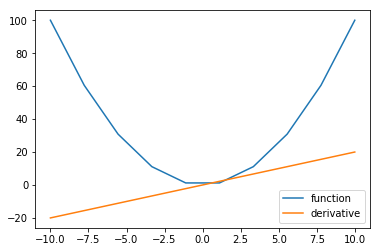

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

x = torch.linspace(-10, 10, 10, requires_grad=True)
Y = x**2
y = torch.sum(x**2)
print(Y)
print(y)

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')
plt.legend()
plt.show()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0303, 0.0909, 0.1515, 0.2121,
        0.2727, 0.3333, 0.3939, 0.4545, 0.5152, 0.5758, 0.6364, 0.6970, 0.7576,
        0.8182, 0.8788, 0.9394, 1.0000, 1.0606, 1.1212, 1.1818, 1.2424, 1.3030,
        1.3636, 1.4242, 1.4848, 1.5455, 1.6061, 1.6667, 1.7273, 1.7879, 1.8485,
        1.9091, 1.9697, 2.0303, 2.0909, 2.1515, 2.2121, 2.2727, 2.3333, 2.3939,
        2.4545, 2.5152, 2.5758, 2.6364, 2.6970, 2.7576, 2.8182, 2.8788, 2.9394,
        3.0000], grad_fn=<ReluBackward>)
tensor(75.7576, grad_fn=<SumBackward0>)


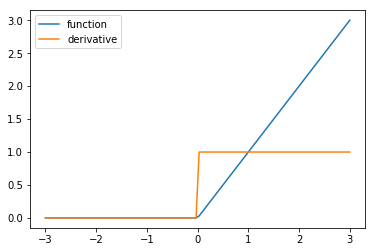

In [30]:
import torch.nn.functional as F

x = torch.linspace(-3, 3, 100, requires_grad=True)
Y = F.relu(x)
y = torch.sum(F.relu(x))
print(Y)
print(y)

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')
plt.legend()
plt.show()